Final comparison plot saved to E:/project\outputs\plots\final_comparison.png

=== Final Strategy Metrics ===
                       Baseline         DQN           PPO
total_return_pct      36.553796    2.438890    333.293149
CAGR_pct               6.618832    3.355196    644.927891
volatility_ann_pct    21.628665   14.700559     12.257765
sharpe                 0.306021    0.228236     52.613824
max_drawdown_pct     -37.086170  -15.477903     -0.020783
calmar                 0.178472    0.216773  31031.117521
sortino                0.362873    0.335159   5409.848446
n_days              1225.000000  184.000000    184.000000
Final metrics saved to E:/project\outputs\evaluations\final_comparison_metrics.csv

Final metrics saved to E:/project\outputs\evaluations\final_comparison_metrics.json


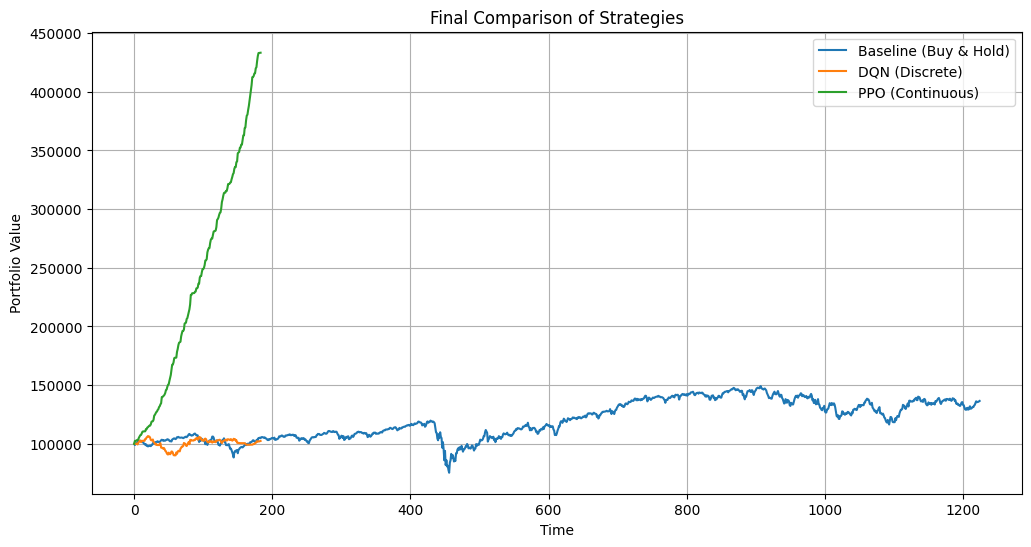

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Paths ----------
PROJECT_ROOT = r"E:/project"
EVAL_PATH = os.path.join(PROJECT_ROOT, "outputs", "evaluations")
PLOT_PATH = os.path.join(PROJECT_ROOT, "outputs", "plots")

os.makedirs(PLOT_PATH, exist_ok=True)

BASELINE_CSV = os.path.join(EVAL_PATH, "baseline_buy_and_hold_equity_test.csv")
DQN_CSV = os.path.join(EVAL_PATH, "dqn_discrete_equity_test.csv")
PPO_CSV = os.path.join(EVAL_PATH, "ppo_continuous_equity_test.csv")

BASELINE_JSON = os.path.join(EVAL_PATH, "baseline_buy_and_hold_metrics_test.json")
DQN_JSON = os.path.join(EVAL_PATH, "dqn_discrete_metrics_test.json")
PPO_JSON = os.path.join(EVAL_PATH, "ppo_continuous_metrics_test.json")

# ---------- Helper ----------
def load_equity_csv(path):
    df = pd.read_csv(path)

    # Try to find equity/portfolio/value column
    for col in ["equity", "portfolio_value", "value"]:
        if col in df.columns:
            return df[col].values

    raise KeyError(f"No equity column found in {path}. Columns available: {df.columns.tolist()}")


def load_metrics(path):
    with open(path, "r") as f:
        return json.load(f)

# ---------- Load Data ----------
baseline_eq = load_equity_csv(BASELINE_CSV)
dqn_eq = load_equity_csv(DQN_CSV)
ppo_eq = load_equity_csv(PPO_CSV)

baseline_metrics = load_metrics(BASELINE_JSON)
dqn_metrics = load_metrics(DQN_JSON)
ppo_metrics = load_metrics(PPO_JSON)

# ---------- Plot Equity Curves ----------
plt.figure(figsize=(12, 6))
plt.plot(baseline_eq, label="Baseline (Buy & Hold)")
plt.plot(dqn_eq, label="DQN (Discrete)")
plt.plot(ppo_eq, label="PPO (Continuous)")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.title("Final Comparison of Strategies")
plt.legend()
plt.grid(True)
final_plot_path = os.path.join(PLOT_PATH, "final_comparison.png")
plt.savefig(final_plot_path)
# plt.close()
print(f"Final comparison plot saved to {final_plot_path}")

# ---------- Metrics Table ----------
metrics_df = pd.DataFrame({
    "Baseline": baseline_metrics,
    "DQN": dqn_metrics,
    "PPO": ppo_metrics
})

print("\n=== Final Strategy Metrics ===")
print(metrics_df)

# Save metrics to CSV
final_metrics_csv = os.path.join(EVAL_PATH, "final_comparison_metrics.csv")
metrics_df.to_csv(final_metrics_csv, index=True)
print(f"Final metrics saved to {final_metrics_csv}")

# Save metrics to JSON
final_metrics_path = os.path.join(EVAL_PATH, "final_comparison_metrics.json")
with open(final_metrics_path, "w") as f:
    json.dump(metrics_df.to_dict(), f, indent=4)

print(f"\nFinal metrics saved to {final_metrics_path}")
